### Basic Setting

In [1]:
data_dir = './data/project2_data/'
train_data = data_dir+'olid-training-v1.0.tsv'
test_data_file = data_dir+'testset-levelc.tsv'
test_ans_file = data_dir+'labels-levelc.csv'
from sklearn.metrics import f1_score
import re
import random
import matplotlib.pyplot as plt
regex = re.compile('[^a-zA-Z]')
labels = ['IND', 'GRP', 'OTH']

In [2]:
def process_sent(sent):
    segs = sent.split()
    remove = [regex.sub('', i) for i in segs]
    return remove

### Loading training data

In [3]:
first = True
# label = IND|GRP|OTH
vocab = {}
train_w = {}
train_label = {}
with open(train_data, 'r') as f:
    for line in f:
        if first:
            first = False
            continue
        segs = line.split('\t')
        id = segs[0]
        sent = segs[1]
        label = segs[4].strip()
        if label == 'NULL': continue
        sent = process_sent(sent)
        for w in sent:

            if w not in vocab:
                vocab[w] = {}
                vocab[w]['IND'] = 0
                vocab[w]['GRP'] = 0
                vocab[w]['OTH'] = 0
                
            vocab[w][label] += 1
        train_label[str(id)] = label
        train_w[str(id)] = sent

### Define score and condition

In [4]:
def count_score(sent):
    score = {}
    for i in labels:
        score[i] = 0
    for w in sent:
        if w in vocab:
            total = sum([vocab[w][i] for i in vocab[w]])
            flag = True
            for i in labels:
                if vocab[w][i] > 0.5*total:
                    flag = False
            if flag:
                continue
            for i in labels:
                score[i] += vocab[w][i]/total
    for i in labels:
        score[i]/len(sent)
    return score

In [5]:
record = {
    'IND': [],
    'GRP': [],
    'OTH': [],
}
for id in train_w:
    score = count_score(train_w[id])
    record[train_label[id]].append(score)

In [6]:
vocab['USER']

{'IND': 4585, 'GRP': 2512, 'OTH': 828}

### Show Score Distrubution

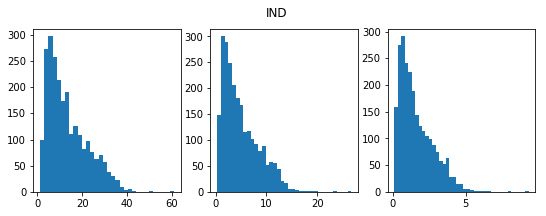

IND
2407
13.491314263886599
GRP
2407
4.972633181715522
OTH
2407
1.6245444530268434


In [7]:
label = 'IND'
sub_record = {
    'IND': [],
    'GRP': [],
    'OTH': [],
}
plt.figure(figsize=(9, 3))
for score in record[label]:
    for t in labels:
        sub_record[t].append(score[t])
        
plt.subplot(131)
plt.hist(sub_record['IND'], bins='auto')
plt.subplot(132)
plt.hist(sub_record['GRP'], bins='auto')
plt.subplot(133)
plt.hist(sub_record['OTH'], bins='auto')
plt.suptitle(label)
plt.show()
for t in labels:
    print(t)
    print(len(sub_record[t]))
    print(sum(sub_record[t])/len(sub_record[t]))

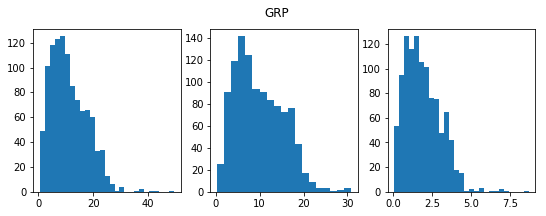

IND
1074
11.144439542261894
GRP
1074
9.891757053668972
OTH
1074
1.930283850996523


In [8]:
label = 'GRP'
sub_record = {
    'IND': [],
    'GRP': [],
    'OTH': [],
}
plt.figure(figsize=(9, 3))
for score in record[label]:
    for t in labels:
        sub_record[t].append(score[t])
        
plt.subplot(131)
plt.hist(sub_record['IND'], bins='auto')
plt.subplot(132)
plt.hist(sub_record['GRP'], bins='auto')
plt.subplot(133)
plt.hist(sub_record['OTH'], bins='auto')
plt.suptitle(label)
plt.show()
for t in labels:
    print(t)
    print(len(sub_record[t]))
    print(sum(sub_record[t])/len(sub_record[t]))

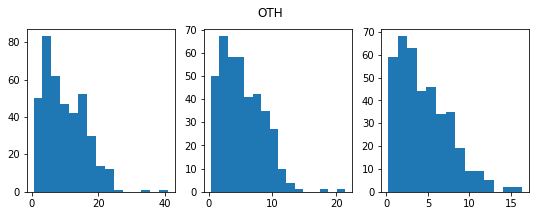

IND
395
9.899439236545884
GRP
395
5.2484173568867485
OTH
395
4.495181381250906


In [9]:
label = 'OTH'
sub_record = {
    'IND': [],
    'GRP': [],
    'OTH': [],
}
plt.figure(figsize=(9, 3))
for score in record[label]:
    for t in labels:
        sub_record[t].append(score[t])
        
plt.subplot(131)
plt.hist(sub_record['IND'], bins='auto')
plt.subplot(132)
plt.hist(sub_record['GRP'], bins='auto')
plt.subplot(133)
plt.hist(sub_record['OTH'], bins='auto')
plt.suptitle(label)
plt.show()
for t in labels:
    print(t)
    print(len(sub_record[t]))
    print(sum(sub_record[t])/len(sub_record[t]))

### Apply on testing data

In [10]:
def count_acc(predict, ans):
    correct = {
        'IND': 0,
        'GRP': 0,
        'OTH': 0,
        'ALL': 0
    }
    total = {
        'IND': 0,
        'GRP': 0,
        'OTH': 0,
        'ALL': 0
    }
    for id in predict:
        total[ans[str(id)]] += 1
        total['ALL'] += 1
        if predict[str(id)] == ans[str(id)]:
            correct[ans[str(id)]] += 1
            correct['ALL'] += 1
    result = [(i, correct[i]/total[i]) for i in correct]
    
    return result

In [11]:
def predict(sent, thres):
    score = count_score(sent)
    if score['IND'] > thres['IND']:
        return 'IND'
    if score['GRP'] > thres['GRP']:
        return 'GRP'
    return 'OTH'

In [12]:
test_w = {}
with open(test_data_file, 'r') as f:
    first = True
    for line in f:
        if first:
            first = False
            continue
        segs = line.split('\t')
        id = segs[0]
        sent = segs[1]
        
        test_w[str(id)] = process_sent(sent)

In [13]:
test_ans = {}
with open(test_ans_file, 'r') as f:
    for line in f:
        segs = line.strip().split(',')
        id = segs[0]
        label = segs[1]
        test_ans[id] = label

### Result

In [14]:
train_best = ''
test_best = ''

for k in range(1, 2):
    i = 10.29 # random.uniform(5, 15)
    j = 1.36 # random.uniform(1, 10)
    k = 2.41 # random.uniform(1, 10)
    thres = {
        'IND': i,
        'GRP': j,
        'OTH': k,
    }

    train_predict = {}
    for id in train_w:
        train_predict[id] = predict(train_w[id], thres)

    test_predict = {}
    for id in test_w:
        test_predict[id] = predict(test_w[id], thres)


#     train_acc = count_acc(train_predict, train_label)
#     test_acc = count_acc(test_predict, test_ans)
#     if not train_best or train_acc[3][1] > train_best[3][1]:
#         train_best = train_acc
#         print(i, j, k, 'train acc:', count_acc(train_predict, train_label))
#         print(i, j, k, 'test acc:', count_acc(test_predict, test_ans))
#     if not test_best or test_acc[3][1] > test_best[3][1]:
#         test_best = test_acc
#         print(i, j, k, 'train acc:', count_acc(train_predict, train_label))
#         print(i, j, k, 'test acc:', count_acc(test_predict, test_ans))
    train_label_list = list(train_label.values())
    train_pre_list = list(train_predict.values())
    print('train f1:', f1_score(train_label_list,train_pre_list
                            , labels=labels, average='macro'))
    test_label_list = list(test_ans.values())
    test_pre_list = list(test_predict.values())
    print('test f1:', f1_score(test_label_list,test_pre_list
                            , labels=labels, average='macro'))

train f1: 0.3648136511741087
test f1: 0.3617283950617283
